In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras 
np.random.seed(42)
tf.random.set_seed(42)

from keras.datasets import fashion_mnist
# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Define the class names
class_names = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

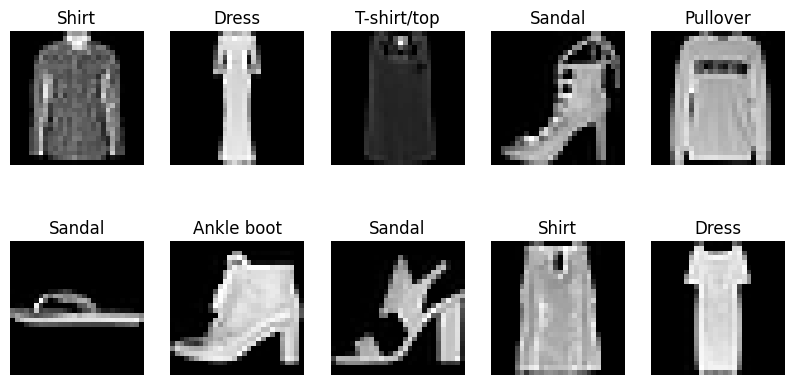

In [5]:
# Select some random images from the dataset
num_images = 10
random_indices = np.random.choice(X_test.shape[0], num_images, replace=False)


# Visualize the images and their labels
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, index in enumerate(random_indices):
    row = i // 5
    col = i % 5
    axs[row, col].imshow(X_test[index], cmap='gray')
    axs[row, col].set_title(class_names[y_test[index]])
    axs[row, col].axis('off')
plt.show()

In [6]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)
y_train shape:  (60000,)
y_test shape:  (10000,)


In [7]:

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [8]:

noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# Clip the pixel values between 0 and 1
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# To be used to define the denoising autoencoder architecture
input_shape = X_train_noisy[0].shape

In [11]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError

# Encoder
# Define input shape with an extra dimension for the number of channels
input_shape = (28, 28, 1)

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create the autoencoder model
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss=MeanSquaredError())

# inputs = Input(sha|

In [12]:

epochs = 20
batch_size = 32

autoencoder.fit(X_train_noisy, X_train, batch_size=batch_size, epochs=epochs)

Epoch 1/20
1875/1875 [==============================] - 108s 57ms/step - loss: 0.0210
Epoch 2/20
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0162
Epoch 3/20
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0151
Epoch 4/20
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0146
Epoch 5/20
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0143
Epoch 6/20
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0141
Epoch 7/20
1875/1875 [==============================] - 104s 56ms/step - loss: 0.0140
Epoch 8/20
1875/1875 [==============================] - 104s 56ms/step - loss: 0.0138
Epoch 9/20
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0138
Epoch 10/20
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0137
Epoch 11/20
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0136
Epoch 12/20
1875/1875 [=============================

1/1 [==============================] - 0s 30ms/step


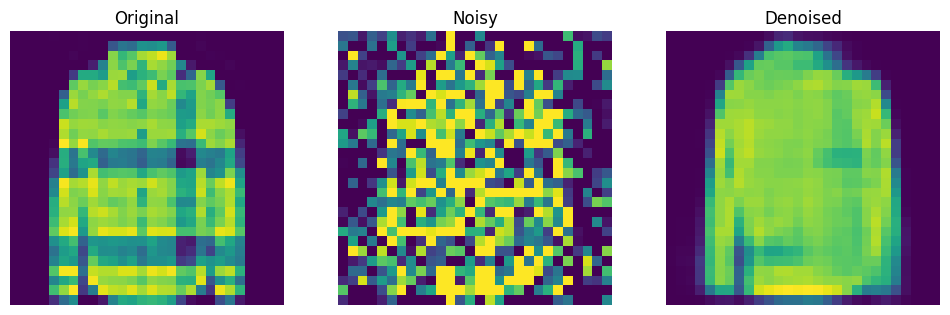

1/1 [==============================] - 0s 16ms/step


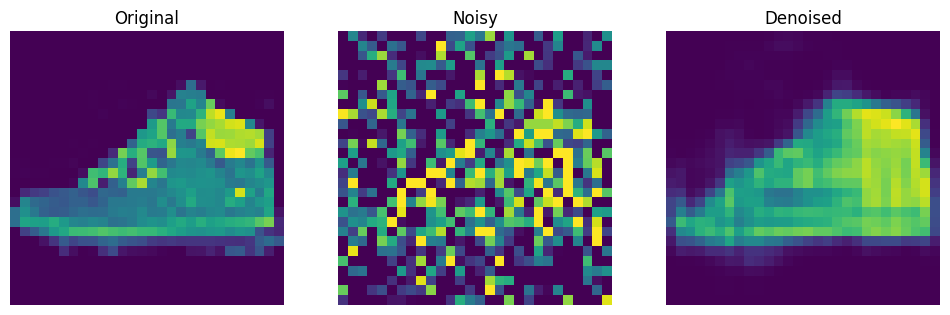

1/1 [==============================] - 0s 15ms/step


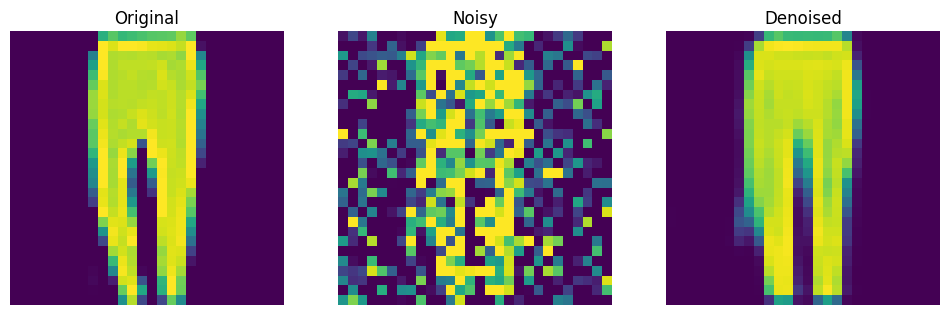

1/1 [==============================] - 0s 16ms/step


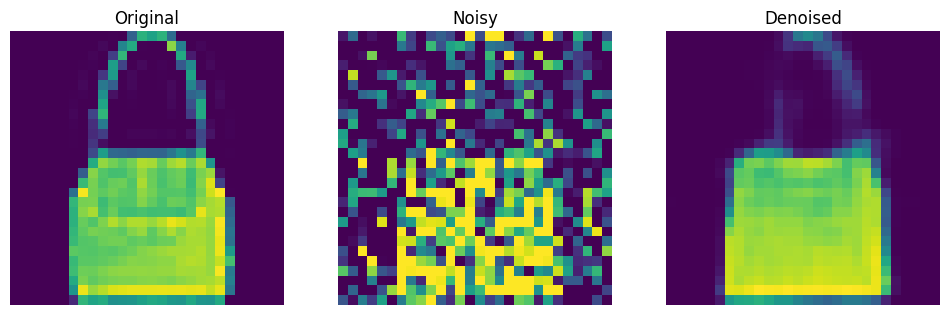

1/1 [==============================] - 0s 32ms/step


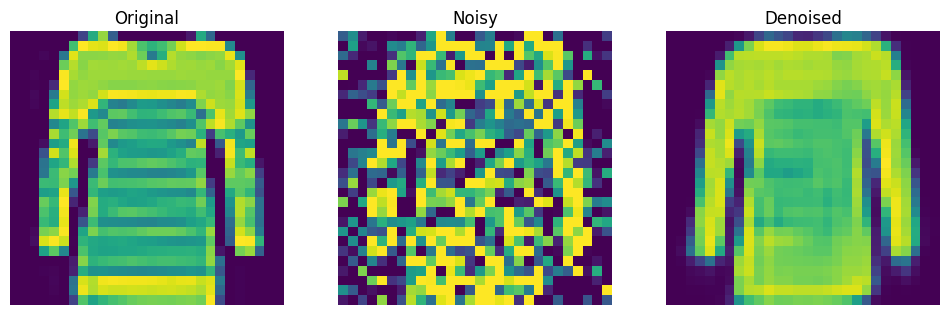

In [14]:
# Denoise a few test images and print the original, noisy, and denoised images
num_samples = 5

for i in range(num_samples):
    # Select a random test image
    index = np.random.randint(0, len(X_test_noisy))
    test_image_noisy = np.expand_dims(X_test_noisy[index], axis=0)

    # Denoise the test image
    denoised_image = autoencoder.predict(test_image_noisy)

    # Rescale pixel values to 0-255 range for visualization
    test_image_noisy = test_image_noisy[0] * 255.
    denoised_image = denoised_image[0] * 255.

    # Convert images to uint8 data type
    test_image_noisy = test_image_noisy.astype(np.uint8)
    denoised_image = denoised_image.astype(np.uint8)

    # Plot the original, noisy, and denoised images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(X_test[index])
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(test_image_noisy)
    plt.title('Noisy')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(denoised_image)
    plt.title('Denoised')
    plt.axis('off')

    plt.show()